In [1]:
import numpy as np
import time
import multiprocessing
import matplotlib.pyplot as plt

from running_utils import trial

In [3]:
from env import ToyEnv
from agents import UCBVI, MVP

def trial(S, A, H, K, trial_id=1):

    env = ToyEnv(S, A, H)
    opt = env.computeOptimalValueFunction()
    opt_rewards = opt * np.ones(K)

    start_time = time.time()

    print("Starting trial " + str(trial_id+1) + " for MVP.")
    
    agent_MVP = MVP(S, A, H, K, env.getRewards(), 1/K)
    rewards_MVP = np.zeros((K, H))

    for k in range(K):
        env.reset()
        agent_MVP.newEpisode()
        state = env.getCurrentState()
        for h in range(H):
            action = agent_MVP.choose(state, h)
            state, reward = env.step(action)
            agent_MVP.update(state, reward)
            rewards_MVP[k, h] = reward

    ep_rewards_MVP = rewards_MVP.sum(axis=1)
    ep_regret_MVP = opt_rewards - ep_rewards_MVP
    ep_regret_MVP = ep_regret_MVP.cumsum()

    print("Terminating trial " + str(trial_id+1) + " for MVP. Elapsed time: " + str(int(time.time() - start_time)) + " sec")
    
    start_time = time.time()

    print("Starting trial " + str(trial_id+1) + " for UCBVI-BF.")
    
    
    agent_BF = UCBVI(S, A, H, K, env.getRewards(), 'BF')
    rewards_BF = np.zeros((K, H))

    """
    for k in range(K):
        env.reset()
        agent_BF.newEpisode()
        state = env.getCurrentState()
        for h in range(H):
            action = agent_BF.choose(state, h)
            state, reward = env.step(action)
            agent_BF.update(state, reward)
            rewards_BF[k, h] = reward
    """

    ep_rewards_BF = rewards_BF.sum(axis=1)
    ep_regret_BF = opt_rewards - ep_rewards_BF
    ep_regret_BF = ep_regret_BF.cumsum()

    print("Terminating trial " + str(trial_id+1) + " for UCBVI-BF. Elapsed time: " + str(int(time.time() - start_time)) + " sec")
    
    return (ep_regret_MVP, ep_regret_BF)

In [4]:
S = 2
A = 2
H = 5
K = 2000000

results1 = trial(S, A, H, K, 0)
results2 = trial(S, A, H, K, 1)
results3 = trial(S, A, H, K, 2)

Starting trial 1 for MVP.


/var/folders/58/jk09dpw90wv_97d9nbc3mnn00000gn/T/ipykernel_16167/2543412045.py:74: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  self.Qstar[s, a, h] = self.R[s, a] + self.Phat[s, a, :].reshape(


Terminating trial 1 for MVP. Elapsed time: 506 sec
Starting trial 1 for UCBVI-BF.
Terminating trial 1 for UCBVI-BF. Elapsed time: 0 sec


(0.0, 800000.0)

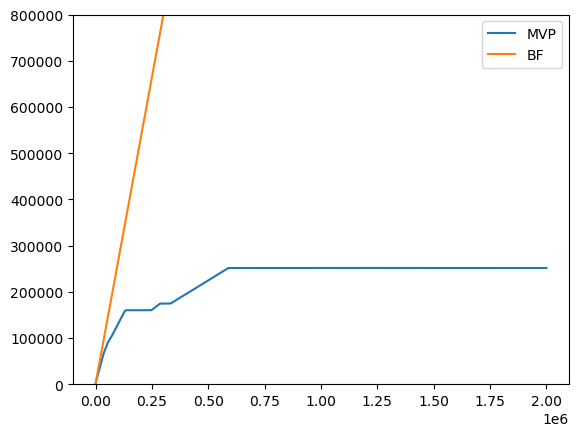

In [5]:
results1_MVP = results1[0]
results1_BF = results1[1]
results2_MVP = results2[0]
results2_BF = results2[1]
results3_MVP = results3[0]
results3_BF = results3[1]

results_MVP = [results1_MVP, results2_MVP, results3_MVP]
results_BF = [results1_BF, results2_BF, results3_BF]

plt.figure()
x_plt = np.linspace(1, K, K)

results = np.array(results_MVP).T
results_mean = results.mean(axis=1)
results_std = results.std(axis=1)

plt.plot(x_plt, results_mean, label="MVP")
plt.fill_between(x_plt, results_mean - results_std, results_mean + results_std, alpha=0.3)

results = np.array(results_BF).T
results_mean = results.mean(axis=1)
results_std = results.std(axis=1)

plt.plot(x_plt, results_mean, label="BF")
plt.fill_between(x_plt, results_mean - results_std, results_mean + results_std, alpha=0.3)

plt.legend()
# plt.yscale("log")
plt.savefig("all.png")
plt.ylim([0, 8e5])

In [17]:
config = {"S" : 2, "A" : 2, "H" : 5, "K" : 50000, "alg_lst" : ["BF", "BFI"], "n_trials" : 4, "n_cores" : 4}
str(config)    

"{'S': 2, 'A': 2, 'H': 5, 'K': 50000, 'alg_lst': ['BF', 'BFI'], 'n_trials': 4, 'n_cores': 4}"